In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 17.38 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 15.8 MB/s eta 0:00:00


In [ ]:
pip install torch --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 859.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python train.py --img 640 --batch 16 --epochs 30 --data "/content/drive/MyDrive/Project1/YOLO/custom_data.yaml" --weights yolov5m.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-12 15:46:04.300189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 15:46:04.641940: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 15:46:04.737137: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [ ]:
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')

def detect_objects(image):
    """
    Detect objects in an image and return the bounding box coordinates and original image.

    Args:
    - image: numpy array of the image (e.g., loaded using OpenCV).

    Returns:
    - original_image: The input image (unchanged).
    - bboxes: List of bounding box coordinates in the format [x_min, y_min, x_max, y_max, confidence, class_id].
    """
    # Convert image to RGB format (required by YOLOv5 model)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run the YOLO model inference
    results = model(rgb_image)

    # Extract bounding boxes and convert to a list
    bboxes = []
    for *box, conf, class_id in results.xyxy[0]:  # xyxy format: (x_min, y_min, x_max, y_max, confidence, class)
        bboxes.append([int(box[0]), int(box[1]), int(box[2]), int(box[3]), float(conf), int(class_id)])

    # Return the original image and the list of bounding box coordinates
    return image, bboxes

# Example usage:
image_path = "/content/drive/MyDrive/Project1/YOLO/images/train/image_1083.jpg"
input_image = cv2.imread(image_path)  # Load the image as a numpy array
original_image, bounding_boxes = detect_objects(input_image)

# Display results
print("Bounding Boxes:", bounding_boxes)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:

!python detect.py --weights "/content/yolov5/runs/train/exp/weights/best.pt" --img 640 --conf 0.25 --source "/content/drive/MyDrive/Project1/YOLO/images/train/image_1083.jpg"

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Project1/YOLO/images/train/image_1083.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolo

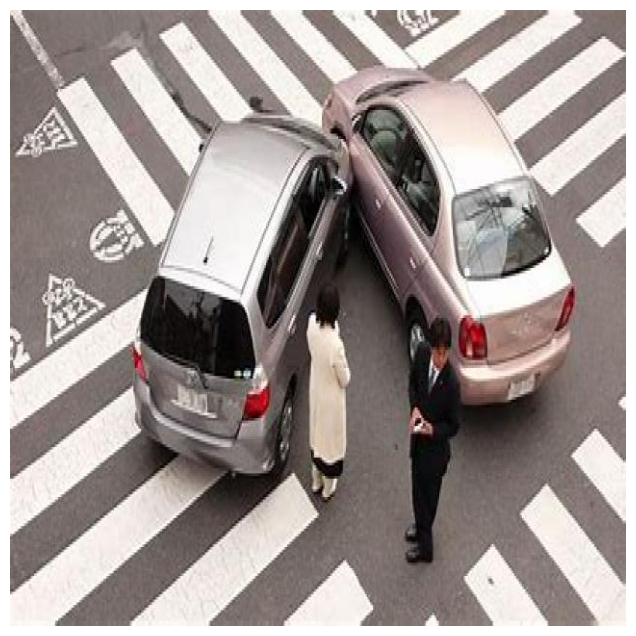

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the detected image
img_path = '/content/drive/MyDrive/Project1/YOLO/images/train/image_1022.jpg'  # Update the path if the output is saved in a different folder
img = cv2.imread(img_path)

# Convert BGR image to RGB (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.show()

AFTER TRAINING WE USE THE SAVED WEIGHTS. BEST.PT

In [ ]:
!python detect.py --weights "/content/best.pt" --img 640 --conf 0.1 --iou-thres 0.4 --source "/content/drive/MyDrive/Project1/YOLO/images/train/image_1022.jpg" --save-txt --save-conf


detect: weights=['/content/best.pt'], source=/content/drive/MyDrive/Project1/YOLO/images/train/image_1022.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.3, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Project1/YOLO/images/train/image_1022.jpg: 640x640 1 accident, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 713.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
1 labels saved t

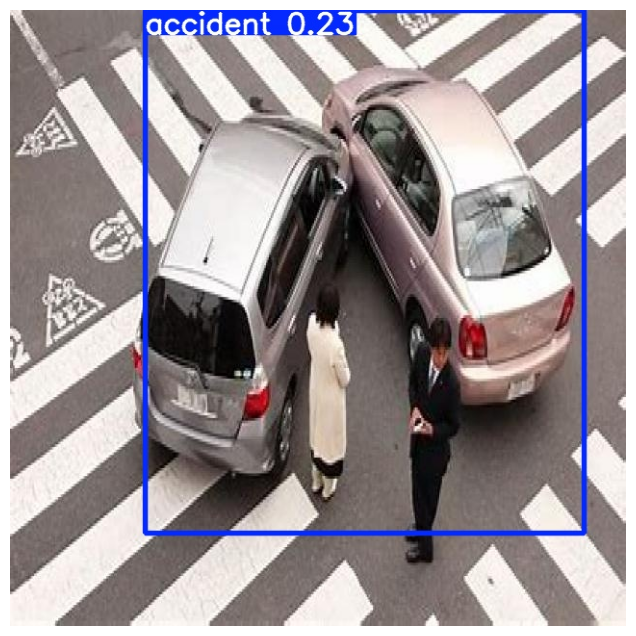

In [ ]:
# Step 2: Display the detected image with bounding boxes
import cv2
from matplotlib import pyplot as plt

# Update the image path to match where YOLO saves the output
output_img_path = '/content/yolov5/runs/detect/exp2/image_1022.jpg'  # Adjust 'exp' if multiple experiments have run

# Load and convert the image
img = cv2.imread(output_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
